### 基于Logistic回归和Sigmoid函数的分类

Logistic回归的一般过程

(1)收集数据：采用任意方法收集数据  
(2)准备数据：由于需要进行距离计算，因此要求数据类型为数值型。此外，结构化数据格式则最佳。  
(3)分析数据：采用任意方法对数据进行分析。  
(4)训练算法：大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数。  
(5)测试算法：一旦训练步骤完成，分类将会很快。  
(6)使用算法：首先，我们需要输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数就可以对这些数值进行简单的回归计算，判定它们属于哪个类别；在这之后，我们就可以在输出的类别上做一些其他分析工作。

Logistic回归的优缺点：

- 优点：计算代价不高，易于理解和实现。  
- 缺点：容易欠拟合，分类精度可能不高。  
- 适用数据类型：数值型和标称型数据。


在Logistic回归中我们使用到了sigmoid函数，即$\sigma$函数。sigmoid函数的计算公式如下：

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

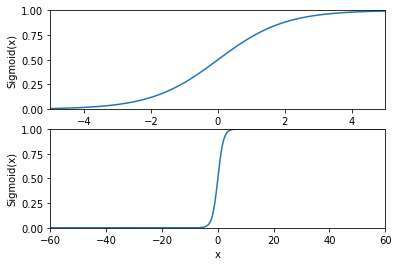

In [101]:
%run sigmoidPlot.py

In [89]:
import matplotlib.pyplot as plt

In [90]:
import math

In [91]:
x = [i/10.0 for i in range(-50,52,2)]

In [92]:
def sigmoid(x):
    return 1.0/(1+math.exp(-x))

In [93]:
y = [sigmoid(i) for i in x]

In [94]:
fig = plt.figure(dpi=100)

In [95]:
ax = fig.add_subplot(121)
ax.plot(x,y,c='red')
ax.set_xlim(-5, 5)
ax.set_ylim(0, 1)

(0, 1)

In [96]:
x1 = [i/10.0 for i in range(-600, 602, 2)]

In [97]:
y1 = [sigmoid(i) for i in x1]

In [98]:
ax = fig.add_subplot(122)
ax.plot(x1,y1,c='red')
ax.set_xlim(-60, 60)
ax.set_ylim(0, 1)

(0, 1)

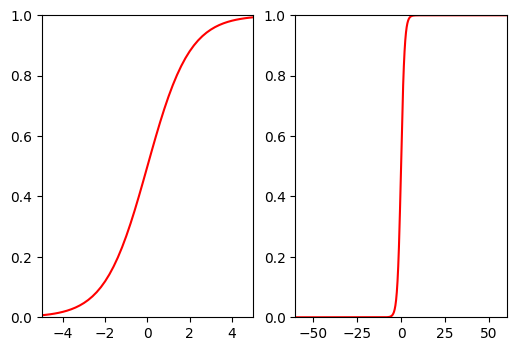

In [99]:
plt.show()

### 基于最优化方法的最佳回归系数确定

sigmoid函数的输入记为z，由下面的公式可以得出：

$$z = w_{0}x_{0} + w_{1}x_{1} + w_{2}x_{2} + \cdot \cdot \cdot + w_{n}x_{n}$$

如果用向量写法，则上述公式可以写为：$z = w^{T}x$，它表示将这两个数值向量对应元素相乘然后全部加起来得到z值。其中，向量$\bf x$是分类器的输入数据，向量$\bf w$是我们要找到的最佳参数，从而使分类器尽可能地精确。

#### 梯度上升法

梯度上升法的思想是：要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻。如果梯度记为$\nabla$，则函数$f(x,y)$的梯度由以下式子表示：
$$\nabla f(x,y) = \left( \begin{array}{c}
\frac{\partial f(x,y)}{\partial x}\\
\frac{\partial f(x,y)}{\partial y}
\end{array} \right)$$

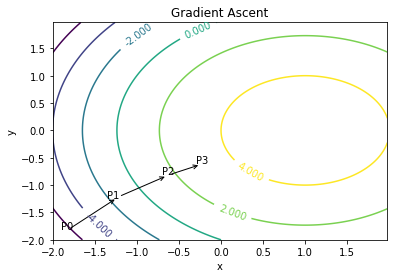

In [100]:
%run plotGD.py

可以看出，梯度算子总是指向函数值增长最快的方向。我们将移动量(步长)记为$\alpha$，则梯度上升算法的迭代公式如下：
$$\bf w := \bf w + \alpha \nabla_{\bf w} f(\bf w)$$

该公式将被一直迭代执行，直到达到某个停止条件为止，比如迭代次数达到某个指定值或者算法达到某个可以允许的误差范围。

梯度下降算法用来求解算法的最小值，梯度上升算法用来求解梯度的最大值。

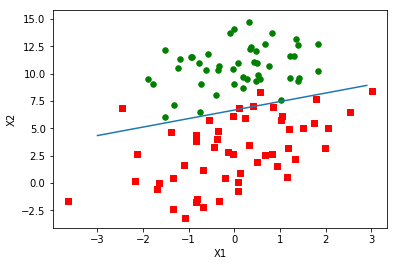

In [102]:
%run plot2D.py

梯度上升的伪代码如下：

    每个回归系数初始化为1
    重复R次：
        计算整个数据集的梯度
        使用$alpha \times gradient$更新回归系数的向量
        返回回归系数   

In [103]:
import logRegres

In [104]:
dataArr, labelMat = logRegres.loadDataSet()

In [105]:
logRegres.gradAscent(dataArr, labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

In [106]:
import numpy as np

In [107]:
reload(logRegres)

<module 'logRegres' from 'logRegres.py'>

随机梯度上升算法的伪代码如下：

    所有回归系数初始化为1
    对数据集中每个样本
        计算该样本的梯度
        使用$alpha \tiems gradient$更新回归系数
    返回回归系数值

In [108]:
reload(logRegres)

<module 'logRegres' from 'logRegres.pyc'>

In [109]:
dataArr, labelMat = logRegres.loadDataSet()

In [110]:
weights = logRegres.stocGradAscent0(np.array(dataArr), labelMat)

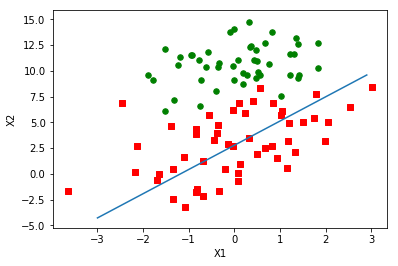

In [111]:
logRegres.plotBestFit(weights)

In [119]:
import plotSDerror

In [120]:
reload(plotSDerror)

<module 'plotSDerror' from 'plotSDerror.py'>

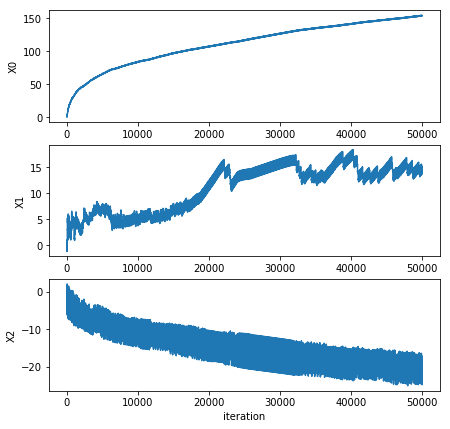

In [121]:
plotSDerror.plotSDError(0)

改进的随机梯度上升算法：  
一方面，$\alpha$在每次迭代的时候都会调整，这会缓解上图的数据波动。虽然$\alpha$会随着迭代次数不断减少，但永远不会减到0，因为我们给alpha的公式中增加了常数项。必须这样做的原因是**为了保证在多次迭代后新数据仍然具有一定的影响** 。该参数$\alpha$每次都会减小$1/(j+i)$，其中j是迭代次数，i是样本点的下标。当$j << max(i)$时，$\alpha$就不是严格下降的。

**避免参数的严格下降** 也常用于模拟退火算法等其他优化算法中。

第二个改进地方是随机选取样本来更新回归系数。**这种方法将减少周期性波动** 。具体实现方法每次随机从列表中选出一个值，然后从列表中删除该值(再进行下一次迭代)。

[ 13.18028267   1.29921303  -1.73357853]


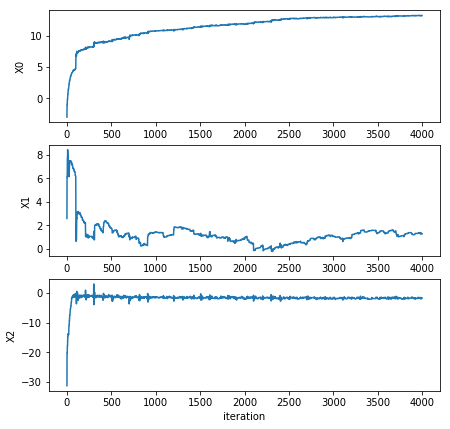

In [122]:
plotSDerror.plotSDError(1)

In [123]:
reload(logRegres)

<module 'logRegres' from 'logRegres.pyc'>

In [124]:
dataArr, labelMat = logRegres.loadDataSet()

In [125]:
weights = logRegres.stocGradAscent1(np.array(dataArr), labelMat)

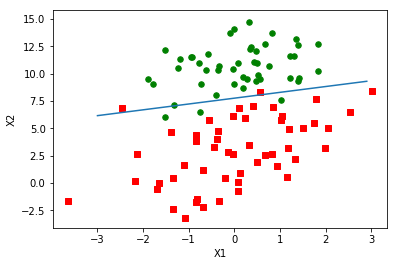

In [126]:
logRegres.plotBestFit(weights)

In [127]:
weights = logRegres.stocGradAscent1(np.array(dataArr), labelMat, 500)

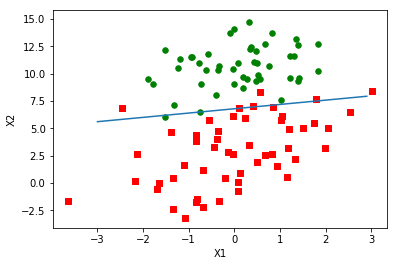

In [128]:
logRegres.plotBestFit(weights)

处理数据中的缺失值可选的做法：

(1) 使用可用特征的均值来填补缺失值  
(2) 使用特殊值来填补缺失值，如-1  
(3) 忽略有缺失值的样本  
(4) 使用相似样本的均值添补缺失值  
(5) 使用另外的机器学习算法预测缺失值  

如果发现数据标签缺失，那么简单的做法是将该条数据丢弃。这是因为类别标签与特征不同很难确定采用某个合适的值来替换。